### Desafios - Aula 01 

Para praticar os métodos aprendidos no decorrer dessa aula e também aprender novos, vamos realizar algumas análises utilizando um arquivo csv diferente: alunos.csv.

1) Importe o arquivo alunos.csv e armazene seu conteúdo em um DataFrame Pandas.

2) Visualize as primeiras 7 linhas do DataFrame e as 5 últimas.

3) Confira a quantidade de linhas e colunas desse DataFrame.

4) Explore as colunas do DataFrame e analise os tipos dos dados presentes em cada coluna.

In [393]:
#1
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
dados = pd.read_csv(url)
dados 

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,NaN,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,NaN,False


In [394]:
#2
print(f'{dados.head(7)}\n')
print(dados.tail(5))

    Nome  Idade  Notas  Aprovado
0    Ary     20    7.5      True
1    Ana     18    NaN     False
2  Cátia     27    2.5     False
3  Denis     18    5.0     False
4   Beto     21   10.0      True
5  Bruna     23    NaN     False
6   Dara     21    7.0      True

      Nome  Idade  Notas  Aprovado
13   Mirla     25    9.0      True
14   Paulo     37    NaN     False
15  Mylena     29    7.0      True
16   Lucas     33    NaN     False
17   Nadia     34    8.0      True


In [395]:
#3
dados.shape

(18, 4)

In [396]:
#4
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Nome      18 non-null     object 
 1   Idade     18 non-null     int64  
 2   Notas     12 non-null     float64
 3   Aprovado  18 non-null     bool   
dtypes: bool(1), float64(1), int64(1), object(1)
memory usage: 582.0+ bytes


### Desafios - Aula 02

O time de ML chegou com algumas demandas de última hora para resolvermos nesse momento da análise exploratória. Essas demandas são:

1) Calcular a média de quartos por apartamento;

2) Conferir quantos bairros únicos existem na nossa base de dados;

3) Analisar quais bairros possuem a média de valor de aluguel mais elevadas;

4) Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.

In [404]:
import pandas as pd

url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep= ';')

imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

df = df.query('@imoveis_comerciais not in Tipo')
df = df.query('Tipo == "Apartamento"')
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32951,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [405]:
# 1 Calcular a média de quartos por apartamento;
df['Quartos'].mean()

2.481568707761622

In [406]:
# 2 Conferir quantos bairros únicos existem na nossa base de dados;
df_bairros = df.groupby('Bairro')[['Bairro']].value_counts().to_frame()
df_bairros.query('count == 1')

,count
Bairro,
Caju,1
Cidade Jardim,1
Coelho Neto,1
Grumari,1
Joá,1
Parque Anchieta,1
Saúde,1


In [407]:
# 2 - Resposta correta
df['Bairro'].nunique()

149

In [408]:
#3 Analisar quais bairros possuem a média de valor de aluguel mais elevadas;
df.groupby('Bairro')[['Valor']].mean().sort_values(by='Valor').tail()

,Valor
Bairro,
Botafogo,9369.207116
Ipanema,9487.205317
Cidade Jardim,12000.000000
Arpoador,12429.769231
Joá,15500.000000


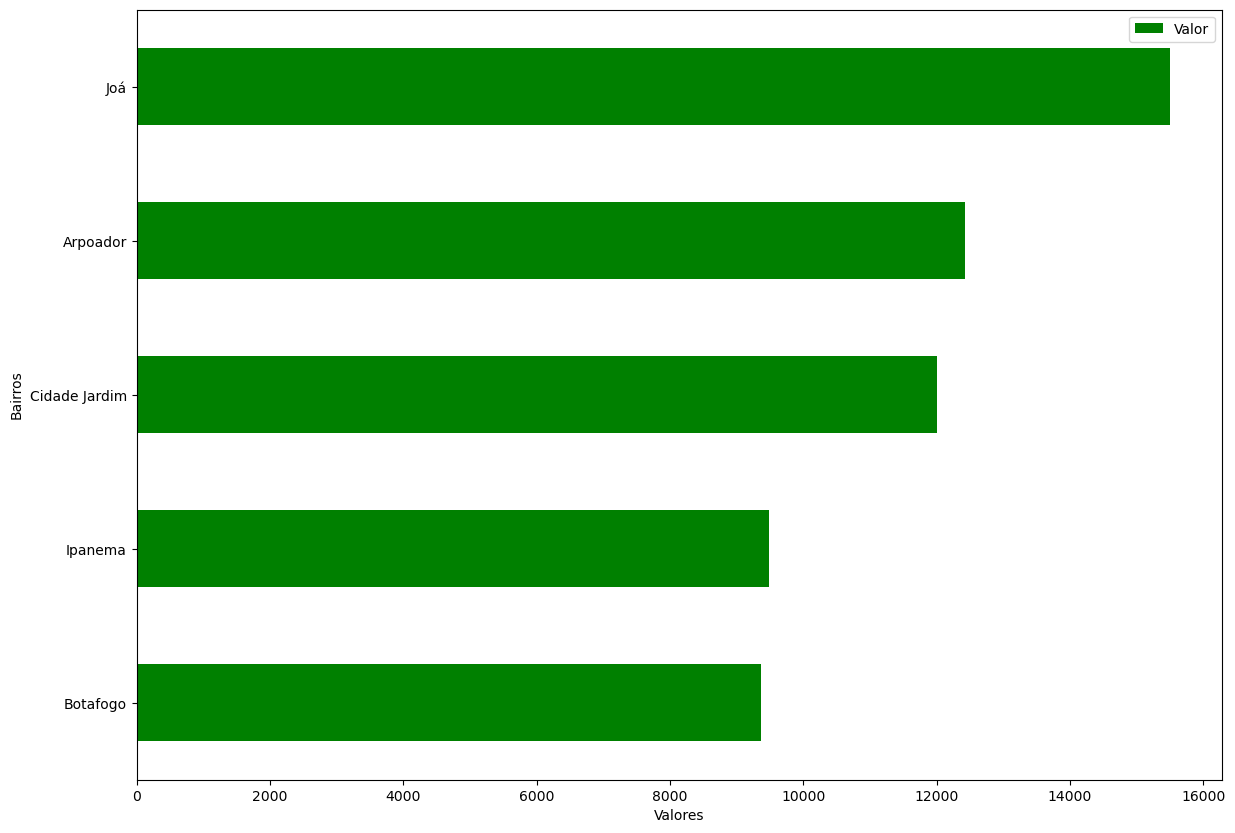

In [409]:
# 4 Criar um gráfico de barras horizontais que apresente os 5 bairros com as médias de valores de aluguel mais elevadas.
df_graficos = df.groupby('Bairro')[['Valor']].mean().sort_values(by='Valor').tail()
df_graficos.plot(kind='barh', figsize=(14,10), color='green', xlabel='Valores', ylabel='Bairros');

### Desafio - Aula 03

Solucione os problemas propostos abaixo utilizando os conhecimentos adquiridos até aqui.

1) Verifique se a base de dados possui dados nulos e, caso tenha, realize o tratamento desses dados nulos da forma que achar mais coerente com a situação.

2) Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados.

3) Aplique um filtro que selecione apenas os alunos que foram aprovados.

4) Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv".

In [15]:
# Importando dados do alunos
import pandas as pd
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
dados = pd.read_csv(url)

In [17]:
# Verifique se a base de dados possui dados nulos e, caso tenha, 
# realize o tratamento desses dados nulos da forma que achar mais coerente com a situação.

dados.isnull().sum()
dados = dados.fillna(0)
dados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
7,Carlos,19,6.0,True
8,Alice,35,5.6,False
9,Vitor,28,0.0,False


In [19]:
# Os alunos "Alice" e "Carlos", não fazem mais parte da turma. Sendo assim, remova-os da base de dados.
registro_remover = dados.query('Nome == "Alice" | Nome == "Carlos"').index
dados.drop(registro_remover, axis=0, inplace=True)
dados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,0.0,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True
5,Bruna,23,0.0,False
6,Dara,21,7.0,True
9,Vitor,28,0.0,False
10,Daniel,21,0.0,False
11,Igor,24,4.5,False


In [21]:
# Aplique um filtro que selecione apenas os alunos que foram aprovados
filtro_aprovados = dados.query('Aprovado == True')
filtro_aprovados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,7.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,7.0,True
17,Nadia,34,8.0,True


In [23]:
# Salve o DataFrame que possui apenas os alunos aprovados em um arquivo csv chamado "alunos_aprovados.csv".
filtro_aprovados.to_csv('alunos_aprovados.csv', index=False)
pd.read_csv('alunos_aprovados.csv')

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Beto,21,10.0,True
2,Dara,21,7.0,True
3,Sthefanie,26,9.5,True
4,Mirla,25,9.0,True
5,Mylena,29,7.0,True
6,Nadia,34,8.0,True


###### Extra: 
Ao conferir as notas dos alunos aprovados, notamos que algumas notas estavam incorretas. As alunas que tiraram nota 7.0, na verdade, tinham um ponto extra que não foi contabilizado. Sendo assim, substitua as notas 7.0 da base de dados por 8.0. Dica: pesquise pelo método replace.

In [26]:
filtro_aprovados = filtro_aprovados.replace(7.0,8.0)
filtro_aprovados

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,8.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,8.0,True
17,Nadia,34,8.0,True


### Desafio - Aula 04

Esse arquivo é o mesmo utilizado para resolução dos desafios da aula 1 e 3 e possui dados referentes a alunos de um curso superior. Com base nisso, solucione os problemas propostos abaixo utilizando os conhecimentos adquiridos até aqui.

1 - Os alunos participaram de uma atividade extracurricular e ganharam pontos extras. Esses pontos extras correspondem a 40% da nota atual de cada um deles. Com base nisso, crie uma coluna chamada 'Pontos_extras' que contenha os pontos extras de cada aluno, ou seja, 40% da nota atual deles.




In [31]:
dados['Pontos_extra'] = dados['Notas'] * 0.40
dados

,Nome,Idade,Notas,Aprovado,Pontos_extra
0,Ary,20,7.5,True,3.0
1,Ana,18,0.0,False,0.0
2,Cátia,27,2.5,False,1.0
3,Denis,18,5.0,False,2.0
4,Beto,21,10.0,True,4.0
5,Bruna,23,0.0,False,0.0
6,Dara,21,7.0,True,2.8
9,Vitor,28,0.0,False,0.0
10,Daniel,21,0.0,False,0.0
11,Igor,24,4.5,False,1.8


2 - Crie mais uma coluna, chamada "Notas_finais" que possua as notas de cada aluno somada com os pontos extras.

In [490]:
dados['Notas_finais'] = dados['Notas'] + dados['Pontos_extra']
dados

,Nome,Idade,Notas,Aprovado,Pontos_extra,Notas_finais
0,Ary,20,7.5,True,3.0,10.5
1,Ana,18,0.0,False,0.0,0.0
2,Cátia,27,2.5,False,1.0,3.5
3,Denis,18,5.0,False,2.0,7.0
4,Beto,21,10.0,True,4.0,14.0
5,Bruna,23,0.0,False,0.0,0.0
6,Dara,21,7.0,True,2.8,9.8
9,Vitor,28,0.0,False,0.0,0.0
10,Daniel,21,0.0,False,0.0,0.0
11,Igor,24,4.5,False,1.8,6.3


3 - Como houve uma pontuação extra, alguns alunos que não tinham sido aprovados antes podem ter sido aprovados agora.Com base nisso, crie uma coluna chamada "Aprovado_final" com os seguintes valores:

True: caso o aluno esteja aprovado (nota final deve ser maior ou igual a 6);
 \ False: caso o aluno esteja reprovado (nota final deve ser menor que 6).



In [492]:
dados['Aprovado_final'] = dados['Notas_finais'].apply(lambda x: True if x >= 6 else False)
dados

,Nome,Idade,Notas,Aprovado,Pontos_extra,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.0,10.5,True
1,Ana,18,0.0,False,0.0,0.0,False
2,Cátia,27,2.5,False,1.0,3.5,False
3,Denis,18,5.0,False,2.0,7.0,True
4,Beto,21,10.0,True,4.0,14.0,True
5,Bruna,23,0.0,False,0.0,0.0,False
6,Dara,21,7.0,True,2.8,9.8,True
9,Vitor,28,0.0,False,0.0,0.0,False
10,Daniel,21,0.0,False,0.0,0.0,False
11,Igor,24,4.5,False,1.8,6.3,True


4 - Faça uma seleção e verifique quais alunos não tinham sido aprovados anteriormente, mas foram aprovados após a soma dos pontos extras.

In [496]:
dados.query('Aprovado != Aprovado_final')

,Nome,Idade,Notas,Aprovado,Pontos_extra,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.0,7.0,True
11,Igor,24,4.5,False,1.8,6.3,True


In [35]:
dados.query('Aprovado == False & Aprovado_final == True')

UndefinedVariableError: name 'Aprovado_final' is not defined